In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Calculate expected values for various values of p between 0 and 1
rnd = np.random.default_rng()

# Number of samples / trials per probability value
num_samples = 5000

# Grid side size
L = 10

# Total grid size
N = L * L

# Probability values to test, between 0 and 1
can_prob = np.linspace(0, 1, 101)

# Vectors of expected values and variances (to be filled)
exp_values = np.zeros(can_prob.shape)
variances = np.zeros(can_prob.shape)

# Loop through the probability values to test
for cp_i in range(len(can_prob)):

    # Vector of how many steps it took to catch all cans for each trial for
    # the current probability (to be filled)
    samples = np.zeros(num_samples, dtype=np.int32)

    # Do `num_samples` trials for the current probability
    for i in range(num_samples):

        # Grid with `can_prob[cp_i]` chance of having can
        grid = rnd.choice((True, False), size=L * L,p=[can_prob[cp_i], 1 - can_prob[cp_i]])

        # Total cans in grid
        total_cans = np.sum(grid)

        # Grid indices to go try in grid
        indices = np.arange(0, L * L, 1, dtype=np.int32)

        # Shuffle grid indices
        rnd.shuffle(indices)

        # Catch cans!
        caught_cans = 0
        steps_to_catch_all_cans = 0

        # Go over each index (indices are shuffled)
        for idx in indices:

            # Exit loop if all cans are caught
            if caught_cans == total_cans:
                break

            # Otherwise increment number of steps to catch all cans
            steps_to_catch_all_cans += 1

            # Is there a can in this grid cell?
            if grid[idx]:

                # If so, increment number of caught cans
                caught_cans += 1

        # Keep record of how many steps it took to catch all cans
        samples[i] = steps_to_catch_all_cans

    # Determine and keep the expected value for the current probability
    exp_values[cp_i] = np.mean(samples)

    # Determine and keep the variance value for the current probability
    variances[cp_i] = np.var(samples)

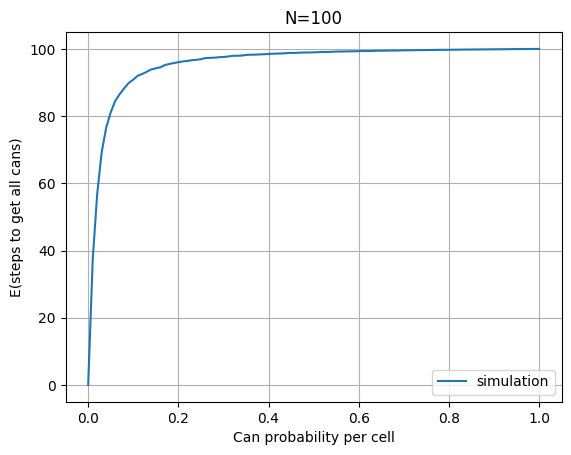

In [27]:
# Plot the expected value
ax = plt.subplot()
ax.plot(can_prob, exp_values, label='simulation')
ax.grid()
ax.set_xlabel('Can probability per cell')
ax.set_ylabel('E(steps to get all cans)')
ax.set_title(f'N={N}')
ax.legend()

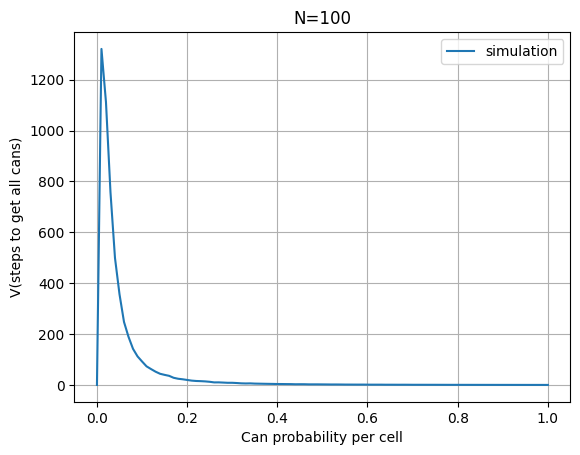

In [28]:
# Plot the variance
ax = plt.subplot()
ax.plot(can_prob, variances, label='simulation')
ax.grid()
ax.set_xlabel('Can probability per cell')
ax.set_ylabel('V(steps to get all cans)')
ax.set_title(f'N={N}')
ax.legend()